# Calculate Posteriors For Means For Patients With And Without CHD

Created: 2023-09-09 by Tom Lever

Updated: 2023-09-09 by Tom Lever

The data set `CHDdata.csv` contains cases of coronary heart disease (CHD) and variables associated with the patient's condition: systolic blood pressure (`sbp`, $mm \ Hg$), yearly tobacco use (`tobacco`, $kg$), low-density lipoprotein (`ldl`), adiposity (`adiposity`), famly history of CHD (`famhist`, 0 or 1), type-A personality score (`typea`), obesity (`obesity`), alcohol use (`alcohol`), age (`age`, $years$), and the diagnosis of CHD (`chd`, 0 or 1).

Perform a Bayesian analysis of these data that finds the posterior marginal probability distributions for the means for the data of patients with and without CHD. You should first standardize (i.e., subtract the mean from and divide by the standard deviation) all the numeric variables (remove family history and do not scale CHD). Then separate the data into two sets, one for patients with CHD and one for patients without CHD.

Your priors for both groups should assume means of $0$ for all variables and a correlation of $0$ between all pairs of variables. You should assume all variables for the variables are $1$. Use a prior $alpha$ equal to $1$ plus the number of predictor variables. Compute and compare the Bayesian estimates for the posterior means for each group.

For $5$ extra credit points, compute the probability of observing a point at least as extreme as the posterior mean of patients without CHD under the posterior distribution for the patients with CHD. Then compute the probability of observing a point at least as extreme as the posterior mean of patients with CHD under the posterior distribution for the patients without CHD.

In [6]:
import pandas as pd
data_frame_of_patient_characteristics_and_indicators_of_CHD = pd.read_csv('CHDdata.csv')
data_frame_of_patient_characteristics_and_indicators_of_CHD.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [7]:
data_frame_of_patient_characteristics_and_indicators_of_CHD = data_frame_of_patient_characteristics_and_indicators_of_CHD.drop(columns = "famhist")
data_frame_of_patient_characteristics_and_indicators_of_CHD

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,64,27.35,23.97,40,0


In [8]:
data_frame_of_patient_characteristics_and_indicators_of_CHD.keys()

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol',
       'age', 'chd'],
      dtype='object')

In [9]:
import numpy as np
for key in data_frame_of_patient_characteristics_and_indicators_of_CHD.keys()[0:8]:
    print("Standardizing " + key)
    data_frame_of_patient_characteristics_and_indicators_of_CHD[key] = data_frame_of_patient_characteristics_and_indicators_of_CHD[key] - np.mean(data_frame_of_patient_characteristics_and_indicators_of_CHD[key])
    data_frame_of_patient_characteristics_and_indicators_of_CHD[key] = data_frame_of_patient_characteristics_and_indicators_of_CHD[key] / np.std(data_frame_of_patient_characteristics_and_indicators_of_CHD[key])

Standardizing sbp
Standardizing tobacco
Standardizing ldl
Standardizing adiposity
Standardizing typea
Standardizing obesity
Standardizing alcohol
Standardizing age


In [10]:
data_frame_of_patient_characteristics_and_indicators_of_CHD.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,462.000000
mean,-1.384174e-16,-2.210834e-17,3.421986e-16,1.807116e-16,-9.227828e-17,5.978863e-16,2.153160e-16,-9.612321e-18,0.346320
std,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,0.476313
min,-1.823123e+00,-7.924170e-01,-1.817753e+00,-2.401708e+00,-4.089354e+00,-2.695129e+00,-6.969825e-01,-1.906103e+00,0.000000
25%,-6.997535e-01,-7.809742e-01,-7.047170e-01,-7.245926e-01,-6.224081e-01,-7.267824e-01,-6.761275e-01,-8.096968e-01,0.000000
50%,-2.113321e-01,-3.565020e-01,-1.935182e-01,9.112757e-02,-1.059418e-02,-5.680824e-02,-3.898822e-01,1.496582e-01,0.000000
75%,4.724579e-01,4.063492e-01,5.074164e-01,7.489145e-01,7.031887e-01,5.828745e-01,2.800340e-01,8.349118e-01,1.000000
max,3.891408e+00,6.007857e+00,5.119082e+00,2.197976e+00,2.538631e+00,4.878906e+00,5.321938e+00,1.451640e+00,1.000000


In [13]:
data_frame_of_characteristics_and_indicators_of_CHD_for_patients_with_CHD = data_frame_of_patient_characteristics_and_indicators_of_CHD[data_frame_of_patient_characteristics_and_indicators_of_CHD.chd == 1]
data_frame_of_characteristics_and_indicators_of_CHD_for_patients_without_CHD = data_frame_of_patient_characteristics_and_indicators_of_CHD[data_frame_of_patient_characteristics_and_indicators_of_CHD.chd == 0]

In [14]:
data_frame_of_characteristics_and_indicators_of_CHD_for_patients_with_CHD.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.0
mean,0.264268,0.411771,0.361398,0.349128,0.141722,0.137517,0.085909,0.512414,1.0
std,1.156458,1.212965,1.075607,0.908099,1.044840,1.043288,1.070602,0.729735,0.0
min,-1.774281,-0.792417,-1.542213,-2.060752,-3.375571,-2.695129,-0.696983,-1.769052,1.0
25%,-0.528806,-0.465481,-0.386879,-0.250150,-0.545931,-0.572356,-0.677559,-0.004524,1.0
50%,-0.015964,0.107747,0.156949,0.385765,0.193344,0.102370,-0.356351,0.697861,1.0
75%,0.985300,0.994834,0.890513,1.052558,0.805158,0.649991,0.308250,1.109013,1.0
max,3.891408,6.007857,4.553501,2.197976,2.538631,4.674587,5.321938,1.451640,1.0


In [17]:
data_frame_of_characteristics_and_indicators_of_CHD_for_patients_without_CHD.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.0
mean,-0.140010,-0.218157,-0.191469,-0.184968,-0.075085,-0.072857,-0.045514,-0.271478,0.0
std,0.878424,0.787283,0.904178,1.000078,0.970504,0.971876,0.960947,1.019840,0.0
min,-1.823123,-0.792417,-1.817753,-2.401708,-4.089354,-1.970511,-0.696983,-1.906103,0.0
25%,-0.699754,-0.792417,-0.813483,-1.016013,-0.622408,-0.817657,-0.676128,-1.083798,0.0
50%,-0.309016,-0.566831,-0.367543,-0.100580,-0.061579,-0.112639,-0.449789,-0.192969,0.0
75%,0.277089,0.123004,0.264506,0.585513,0.601220,0.480121,0.219923,0.543679,0.0
max,3.696039,3.566733,5.119082,2.142651,2.436662,4.878906,5.244243,1.451640,0.0


C:\Users\Tom\AppData\Local\Temp\ipykernel_11192\2550529684.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\Tom\AppData\Local\Temp\ipykernel_11192\2550529684.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


Text(0.5, 1.0, 'Histogram Of Frequencies Of Standardized Systolic Blood Pressure')

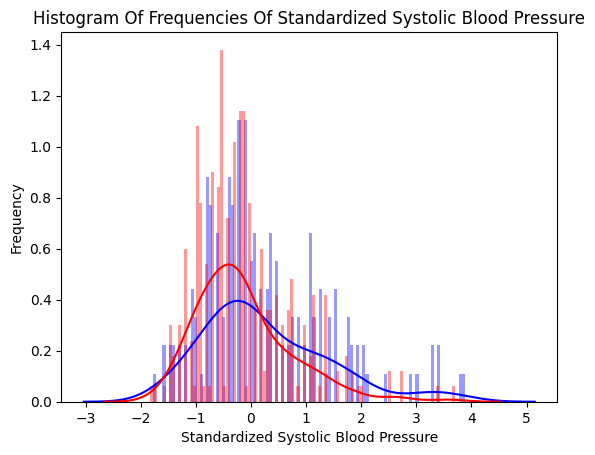

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(
    data_frame_of_characteristics_and_indicators_of_CHD_for_patients_with_CHD['sbp'],
    bins = 100,
    color = 'blue',
    label = 'with CHD'
)
sns.distplot(
    data_frame_of_characteristics_and_indicators_of_CHD_for_patients_without_CHD['sbp'],
    bins = 100,
    color = 'red',
    label = 'without CHD'
)
plt.xlabel('Standardized Systolic Blood Pressure')
plt.ylabel('Frequency')
plt.title('Histogram Of Frequencies Of Standardized Systolic Blood Pressure')